In [1]:
import pandas as pd

data = pd.read_csv('result.csv')
data.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,...,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing,Life expectancy
0,2015,0.831225,0.261880,-1.138088,-0.358384,-0.101739,-0.987357,0.250083,-3.400606,0.942863,...,-0.317913,-0.490445,0.359679,2.729099,2.685552,-0.750781,-0.627591,-0.450545,0.450545,65.0
1,2014,0.896482,0.278185,-1.138088,-0.357303,-0.163251,-1.012464,0.268074,-1.106887,0.951267,...,-0.317913,-0.488408,-0.221725,2.795474,2.728889,-0.765329,-0.658569,-0.450545,0.450545,59.9
2,2013,0.872011,0.294490,-1.138088,-0.357450,-0.169012,-1.037571,0.286064,-0.930447,0.930256,...,-0.317913,-0.487043,0.324790,2.839724,2.772227,-0.794425,-0.689547,-0.450545,0.450545,59.9
3,2012,0.904639,0.318948,-1.138088,-0.355058,0.049996,-1.062678,0.310052,-0.709897,1.094147,...,-0.317913,-0.484305,-0.163089,2.883973,2.837233,-0.828370,-0.720525,-0.450545,0.450545,59.5
4,2011,0.929110,0.335253,-1.138088,-0.389302,0.070995,-1.082763,0.334040,-0.665787,0.820995,...,-0.317913,-0.527749,-0.175590,2.950348,2.880570,-0.872014,-0.813460,-0.450545,0.450545,59.2


### 변수를 따로 추출하지 않은 기본 회귀모델

In [2]:
import random
random.seed(4520)
from sklearn import model_selection

X = data.drop('Life expectancy', axis=1)
Y = data["Life expectancy"]

# 학습모델의 training, test 구분
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.3)

In [3]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# 데이터 표준화 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# 회귀모델
lm = sm.OLS(y_train, x_train)
results = lm.fit()

display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Life expectancy   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          3.393e+04
Date:                Sat, 16 Dec 2023   Prob (F-statistic):                        0.00
Time:                        13:23:57   Log-Likelihood:                         -5083.8
No. Observations:                1858   AIC:                                  1.021e+04
Df Residuals:                    1839   BIC:                                  1.031e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Year                                0.0346   4.35e-05    796.814      0.000       0.035       0.035
Adult Mortality                    -2.1016      0.116    -18.087      0.000      -2.330      -1.874
infant deaths                       9.9376      1.102      9.018      0.000       7.776      12.099
Alcohol                            -0.1772      0.118     -1.497      0.135      -0.409       0.055
percentage expenditure              0.3900      0.211      1.845      0.065      -0.025       0.805
Measles                            -0.0883      0.098     -0.904      0.366      -0.280       0.103
BMI                                 0.6011      0.119      5.053      0.000       0.368       0.834
under-five deaths                 -10.0713      1.096     -9.189      0.000     -12.221      -7.922
Polio                               0.5009      0.118      4.262      0.000       0.270       0.731
Total expenditure                   0.1353      0.094      1.433      0.152      -0.050       0.321
Diphtheria                          0.5989      0.121      4.948      0.000       0.361       0.836
HIV/AIDS                           -2.4849      0.101    -24.680      0.000      -2.682      -2.287
GDP                                 0.4226      0.210      2.016      0.044       0.011       0.834
Population                         -0.0004      0.108     -0.003      0.997      -0.213       0.212
thinness 10-19 years               -0.2959      0.261     -1.134      0.257      -0.807       0.216
thinness 5-9 years                  0.0453      0.262      0.173      0.863      -0.468       0.559
Income composition of resources     1.6429      0.159     10.302      0.000       1.330       1.956
Schooling                           2.5622      0.170     15.053      0.000       2.228       2.896
Status_Developed                    0.2160      0.060      3.605      0.000       0.098       0.334
Status_Developing                  -0.2160      0.060     -3.605      0.000      -0.334      -0.098
==============================================================================
Omnibus:                       74.380   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.742
Skew:                          -0.010   Prob(JB):                     1.58e-49
Kurtosis:                       4.704   Cond. No.                     1.05e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smalles

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(n_jobs=-1)
model.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 테스트 세트 예측
y_pred_test = model.predict(x_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# 결정계수
num_features = x_train.shape[1]
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - num_features - 1)
print(f'Adjusted R-squared: {adjusted_r2}')

Mean Squared Error: 16.49324412734883
Mean Absolute Error: 2.9233870898248426
R-squared: 0.8238690526698806
Adjusted R-squared: 0.8193295952644652


### 변수 선택하지 않은 회귀모델의 잔차 시각화
정규성, 등분산성, 독립성

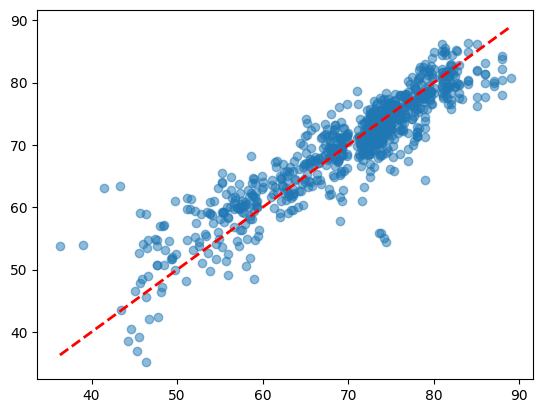

In [6]:
import matplotlib.pyplot as plt

# 산점도 그래프 그리기
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

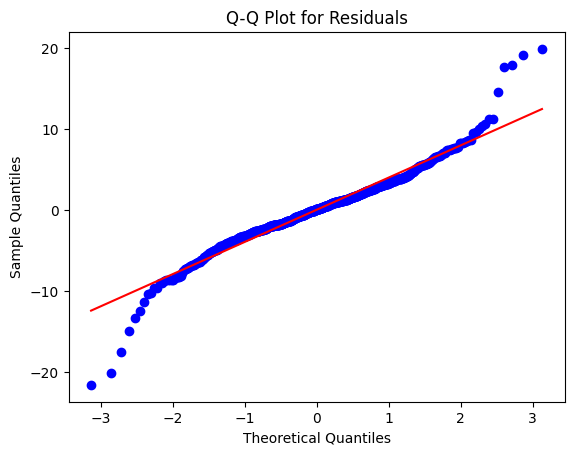

In [7]:
import pylab
import numpy as np
import scipy.stats as stats

# 정규성
residuals = y_test - y_pred_test

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot for Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

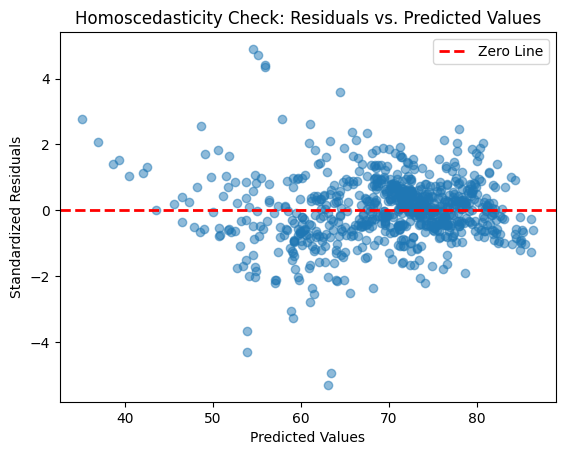

In [8]:
# 잔차의 등분산성
# 표준화된 잔차 계산
residuals = y_test - y_pred_test
std_residuals = residuals / np.std(residuals)

# 산점도 그래프 그리기
plt.scatter(y_pred_test, std_residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Line')

# 그래프에 레이블 및 제목 추가
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals')
plt.title('Homoscedasticity Check: Residuals vs. Predicted Values')
plt.legend()
plt.show()

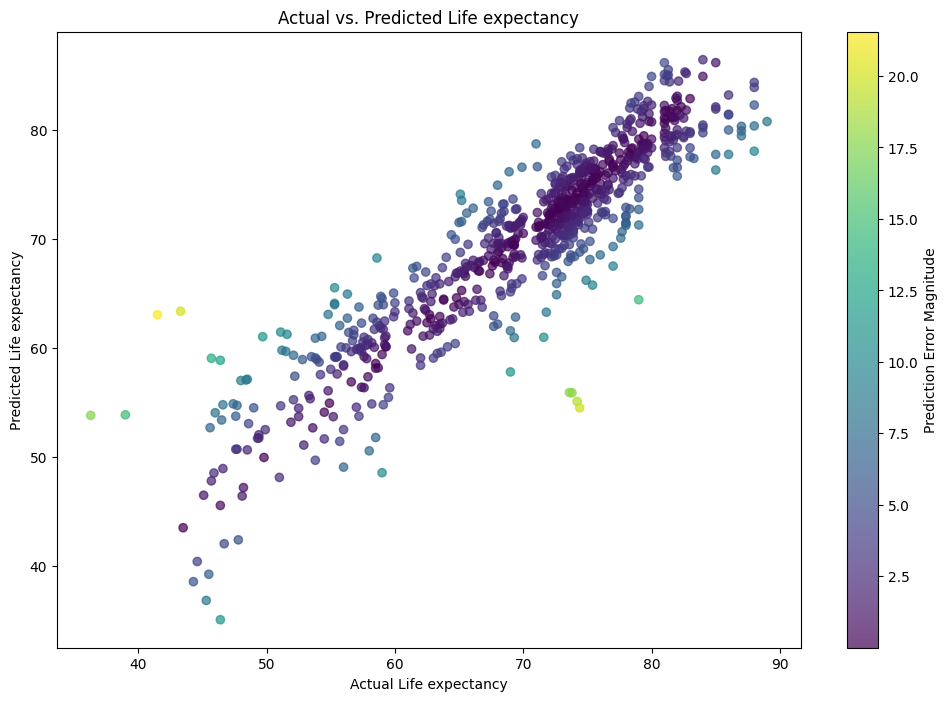

In [9]:
# 예측 오차의 크기에 따라 색상 할당
colors = np.abs(residuals)

# 산점도 시각화
plt.figure(figsize=(12, 8))  # 그림의 크기 조절
plt.scatter(y_test, y_pred_test, c=colors, cmap='viridis', alpha=0.7)
plt.colorbar(label='Prediction Error Magnitude')
plt.xlabel("Actual Life expectancy")
plt.ylabel("Predicted Life expectancy")
plt.title("Actual vs. Predicted Life expectancy")
plt.show()

### 릿지,라쏘,엘라스틱넷
위 3가지는 스스로 변수를 추출할 수 있는 라쏘와 엘라스틱넷이 포함됨

In [10]:
import numpy as np

my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    plot_predictions(name_, pred, actual)
    
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

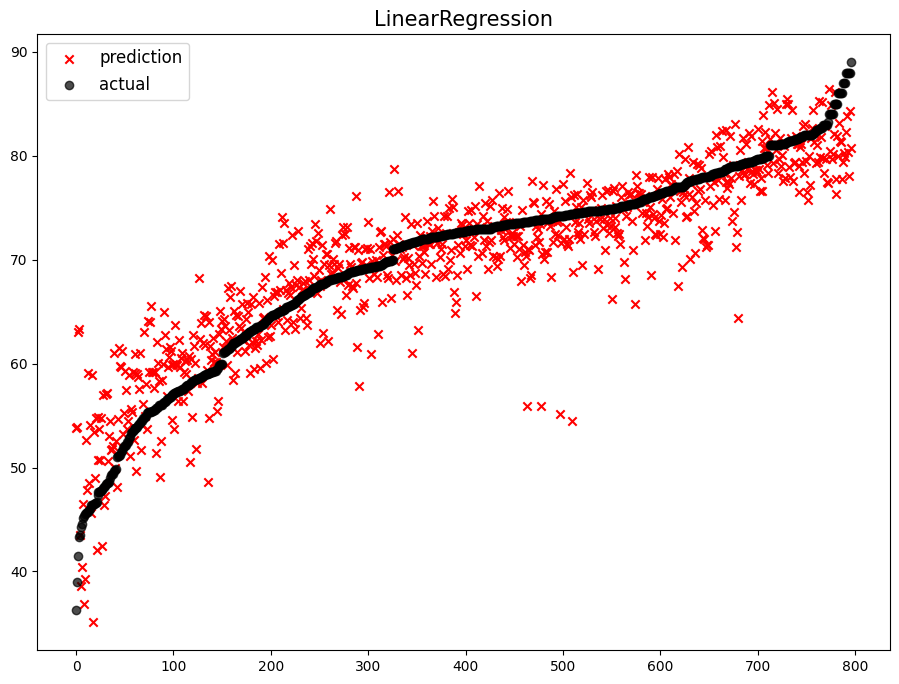

              model        mse
0  LinearRegression  16.493244


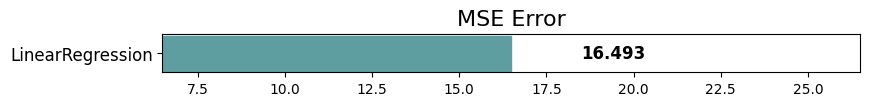

In [11]:
pred = model.predict(x_test)
mse_eval('LinearRegression', pred, y_test)

In [12]:
def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse
    
def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

c:\Users\in001\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.639e+02, tolerance: 1.582e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\in001\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.824e+03, tolerance: 1.582e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\in001\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

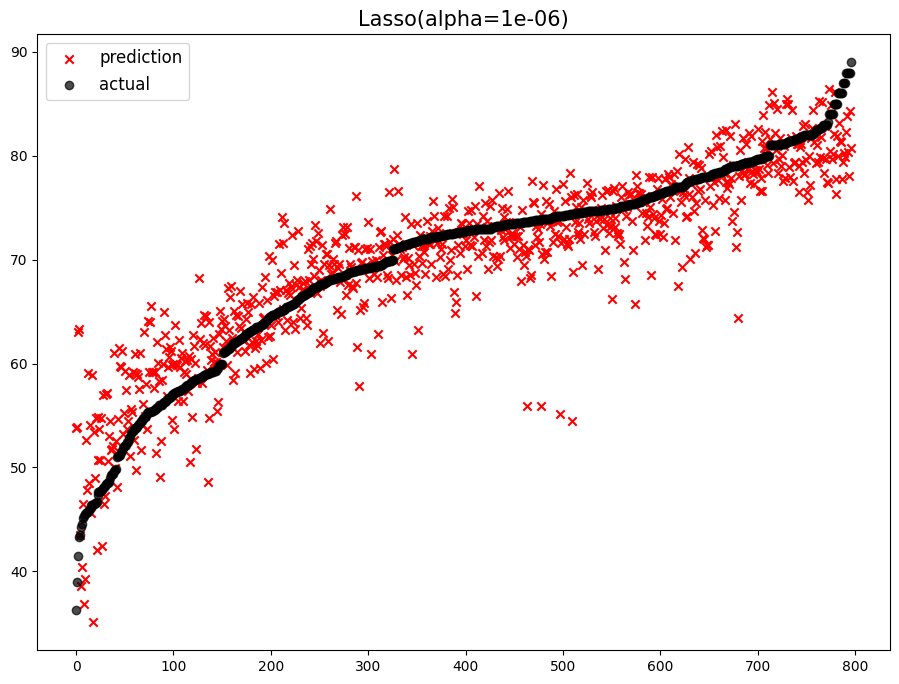

                 model        mse
0    Lasso(alpha=1000)  93.890957
1     Lasso(alpha=100)  93.890957
2      Lasso(alpha=10)  93.890957
3       Lasso(alpha=1)  20.581629
4     Lasso(alpha=0.1)  17.206763
5    Lasso(alpha=0.01)  16.652867
6   Lasso(alpha=0.001)  16.506559
7  Lasso(alpha=0.0001)  16.495865
8   Lasso(alpha=1e-06)  16.494731
9     LinearRegression  16.493244


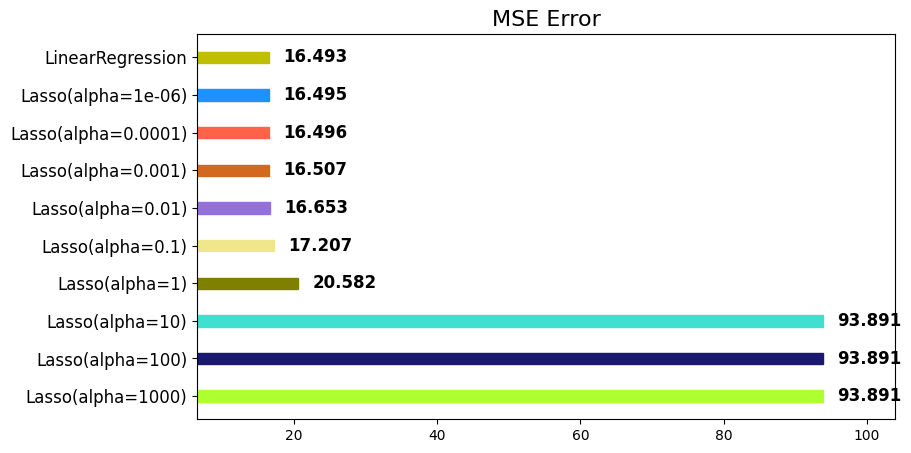

In [13]:
from sklearn.linear_model import Lasso

# 값이 클수록 큰 일반화
alphas = [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.000001]
for alpha in alphas:
    lasso = Lasso(alpha=alpha, random_state=1111)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    add_model('Lasso(alpha={})'.format(alpha), pred, y_test)
plot_all()

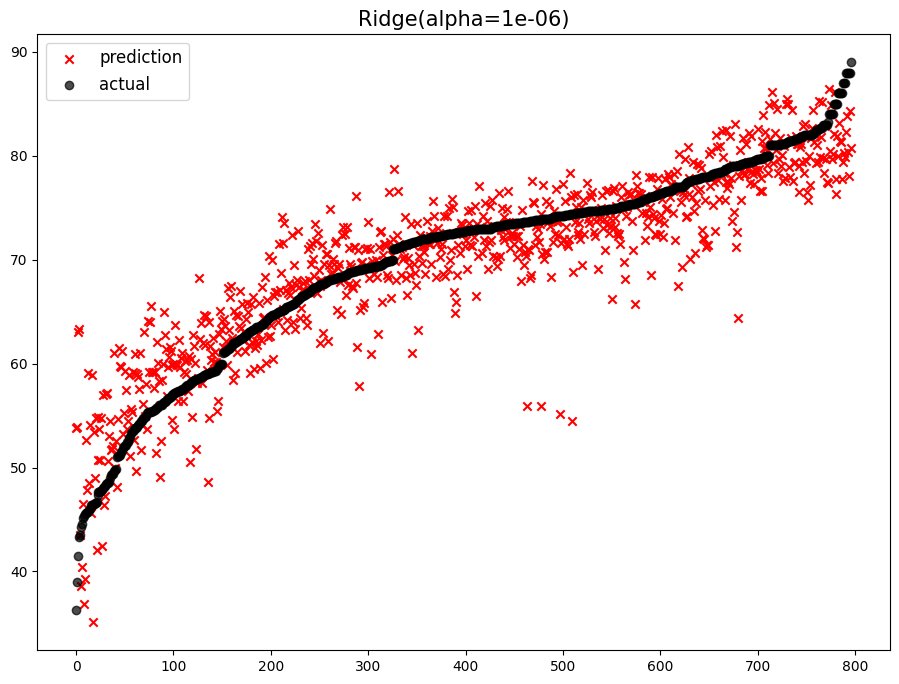

                  model        mse
0     Lasso(alpha=1000)  93.890957
1      Lasso(alpha=100)  93.890957
2       Lasso(alpha=10)  93.890957
3        Lasso(alpha=1)  20.581629
4     Ridge(alpha=1000)  19.290314
5      Ridge(alpha=100)  17.340809
6      Lasso(alpha=0.1)  17.206763
7       Ridge(alpha=10)  16.946427
8     Lasso(alpha=0.01)  16.652867
9        Ridge(alpha=1)  16.568032
10   Lasso(alpha=0.001)  16.506559
11     Ridge(alpha=0.1)  16.500932
12  Lasso(alpha=0.0001)  16.495865
13   Lasso(alpha=1e-06)  16.494731
14    Ridge(alpha=0.01)  16.494014
15   Ridge(alpha=0.001)  16.493321
16  Ridge(alpha=0.0001)  16.493252
17   Ridge(alpha=1e-06)  16.493244
18     LinearRegression  16.493244


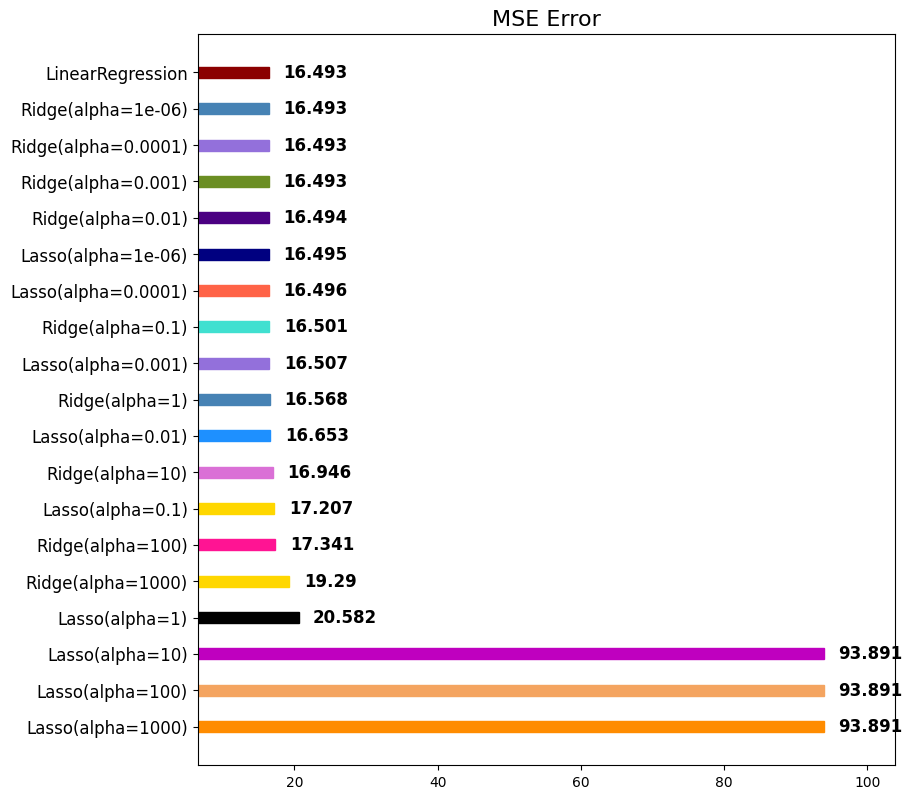

In [14]:
from sklearn.linear_model import Ridge

# 값이 클수록 큰 일반화
alphas = [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.000001]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, random_state=331)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    add_model('Ridge(alpha={})'.format(alpha), pred, y_test)
plot_all()

c:\Users\in001\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.592e+02, tolerance: 1.582e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\in001\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.030e+03, tolerance: 1.582e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\in001\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

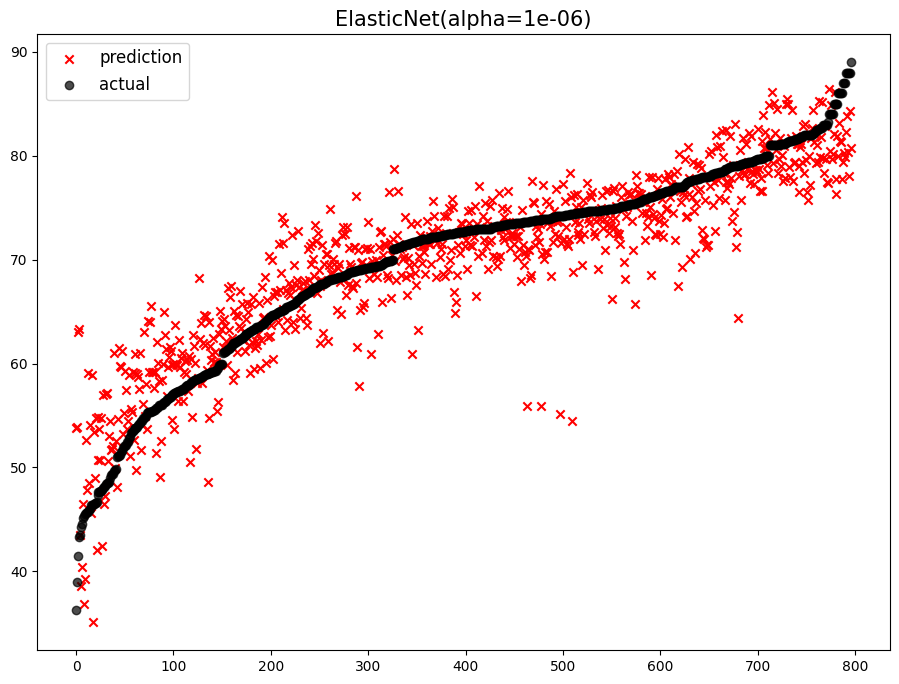

                       model        mse
0          Lasso(alpha=1000)  93.890957
1           Lasso(alpha=100)  93.890957
2            Lasso(alpha=10)  93.890957
3     ElasticNet(alpha=1000)  93.890957
4      ElasticNet(alpha=100)  93.890957
5       ElasticNet(alpha=10)  83.768450
6        ElasticNet(alpha=1)  20.779084
7             Lasso(alpha=1)  20.581629
8          Ridge(alpha=1000)  19.290314
9           Ridge(alpha=100)  17.340809
10     ElasticNet(alpha=0.1)  17.321993
11          Lasso(alpha=0.1)  17.206763
12    ElasticNet(alpha=0.01)  16.976442
13           Ridge(alpha=10)  16.946427
14         Lasso(alpha=0.01)  16.652867
15   ElasticNet(alpha=0.001)  16.569881
16            Ridge(alpha=1)  16.568032
17        Lasso(alpha=0.001)  16.506559
18  ElasticNet(alpha=0.0001)  16.502329
19          Ridge(alpha=0.1)  16.500932
20       Lasso(alpha=0.0001)  16.495865
21   ElasticNet(alpha=1e-06)  16.494795
22        Lasso(alpha=1e-06)  16.494731
23         Ridge(alpha=0.01)  16.494014


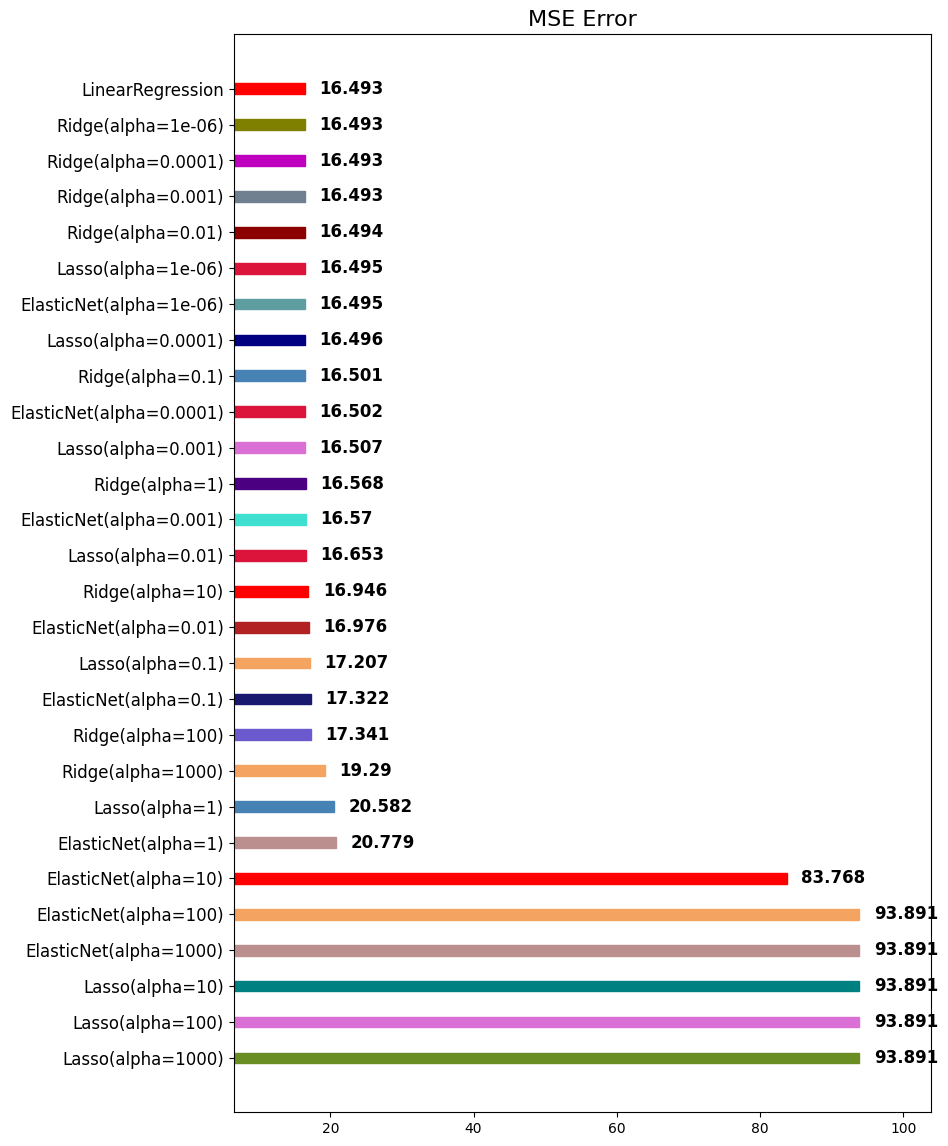

In [15]:
from sklearn.linear_model import ElasticNet

# 값이 클수록 큰 일반화
alphas = [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.000001]
for alpha in alphas:
    elastic = ElasticNet(alpha=alpha, random_state=331)
    elastic.fit(x_train, y_train)
    pred = elastic.predict(x_test)
    add_model('ElasticNet(alpha={})'.format(alpha), pred, y_test)
plot_all()

In [50]:
from sklearn import metrics

# Lasso Regressor 정의
estimator = Lasso(alpha=0.1)
estimator.fit(x_train, y_train)

y_predict = estimator.predict(x_train) 
score = metrics.r2_score(y_train, y_predict)
print(score) #1.0

y_predict = estimator.predict(x_test) 
score = metrics.r2_score(y_test, y_predict)
print(score) #1.0

0.829103237114183
0.8162494013742068


In [17]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

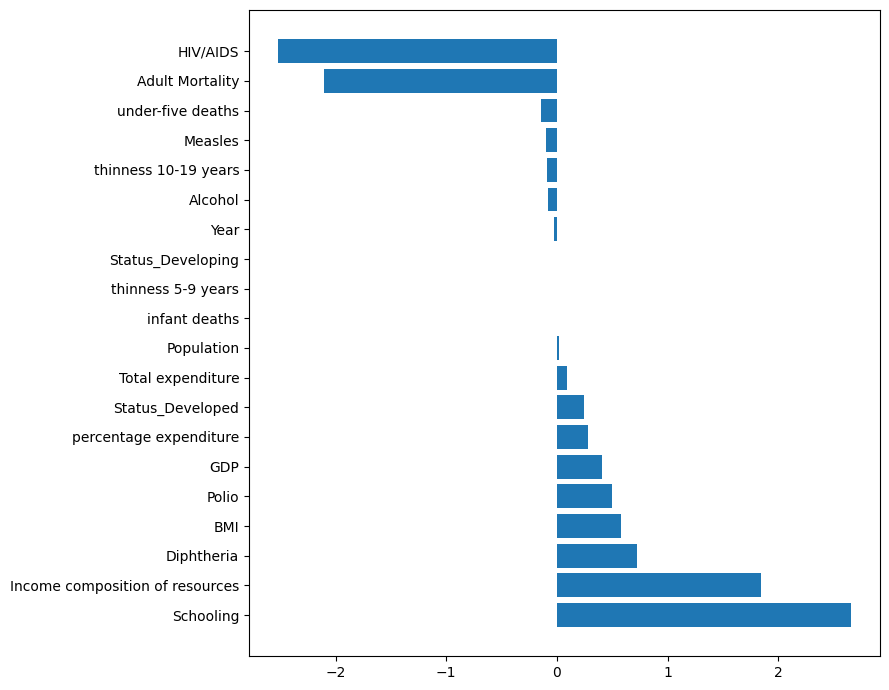

Mean Squared Error: 17.206763079525206
Mean Absolute Error: 2.9782712512105283
R-squared: 0.8162494013742068
Adjusted R-squared: 0.8115135612034389


In [47]:
# 0.1인 경우의 값
plot_coef(x_train.columns, estimator.coef_)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# 결정계수
num_features = x_train.shape[1]
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - num_features - 1)
print(f'Adjusted R-squared: {adjusted_r2}')

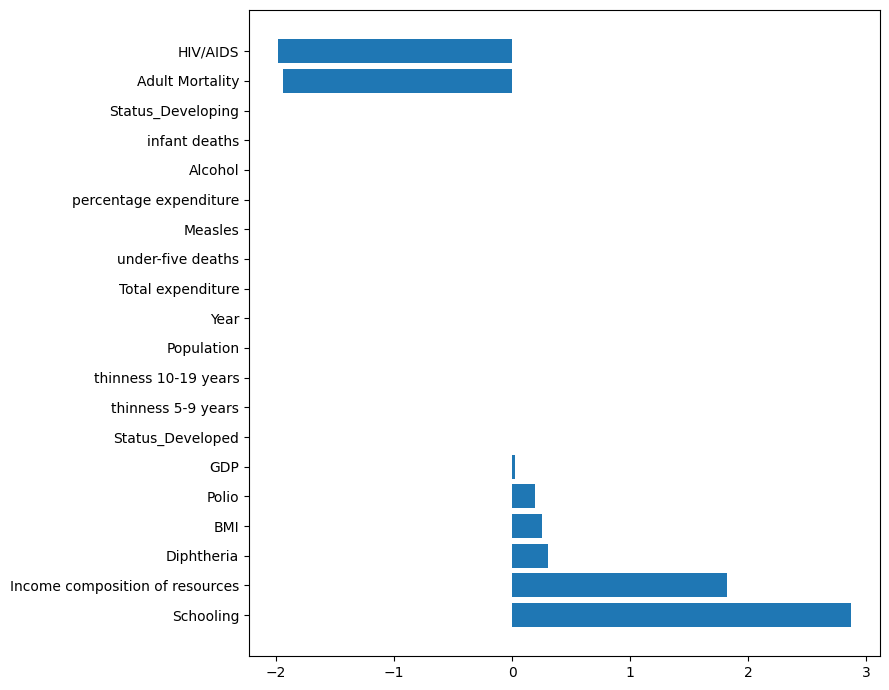

Mean Squared Error: 20.58162930072413
Mean Absolute Error: 3.2735351241642014
R-squared: 0.7802092882186311
Adjusted R-squared: 0.774544579152101


In [49]:
# 1인 경우의 값
plot_coef(x_train.columns, estimator.coef_)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# 결정계수
num_features = x_train.shape[1]
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - num_features - 1)
print(f'Adjusted R-squared: {adjusted_r2}')

In [45]:
# Ridge Regressor 정의
estimator = Ridge(alpha=0.1)
estimator.fit(x_train, y_train)

y_predict = estimator.predict(x_train) 
score = metrics.r2_score(y_train, y_predict)
print(score) #1.0

y_predict = estimator.predict(x_test) 
score = metrics.r2_score(y_test, y_predict)
print(score) #1.0

0.8375901070365088
0.8237869509387783


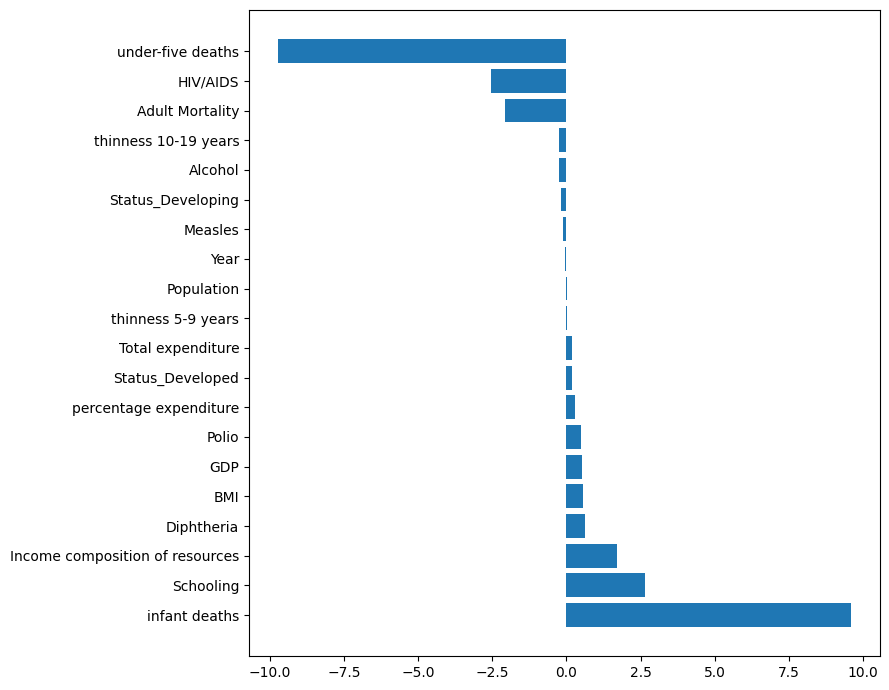

Mean Squared Error: 16.50093229297149
Mean Absolute Error: 2.9242335695118444
R-squared: 0.8237869509387783
Adjusted R-squared: 0.8192453775093653


In [42]:
# 0.1인 경우의 값
plot_coef(x_train.columns, estimator.coef_)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# 결정계수
num_features = x_train.shape[1]
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - num_features - 1)
print(f'Adjusted R-squared: {adjusted_r2}')

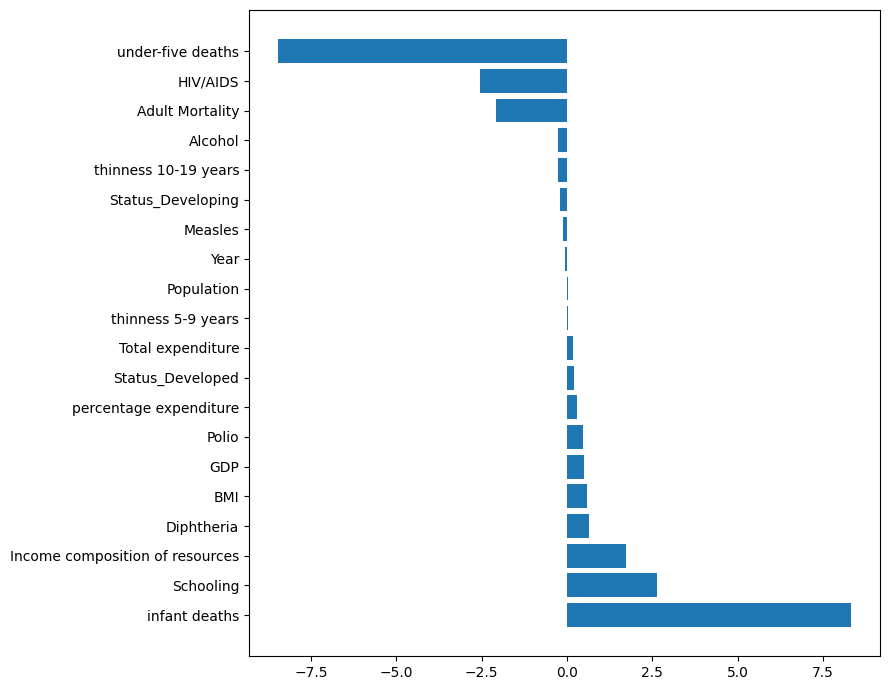

Mean Squared Error: 16.568032336288695
Mean Absolute Error: 2.9318674087903167
R-squared: 0.8230703912308095
Adjusted R-squared: 0.818510349767686


In [44]:
# 1인 경우의 값
plot_coef(x_train.columns, estimator.coef_)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# 결정계수
num_features = x_train.shape[1]
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - num_features - 1)
print(f'Adjusted R-squared: {adjusted_r2}')

In [40]:
from sklearn.linear_model import ElasticNet

# Ridge Regressor 정의
estimator = ElasticNet(alpha=0.1)
estimator.fit(x_train, y_train)

y_predict = estimator.predict(x_train) 
score = metrics.r2_score(y_train, y_predict)
print(score) #1.0

y_predict = estimator.predict(x_test) 
score = metrics.r2_score(y_test, y_predict)
print(score) #1.0

0.8294258173343003
0.8150188602459395


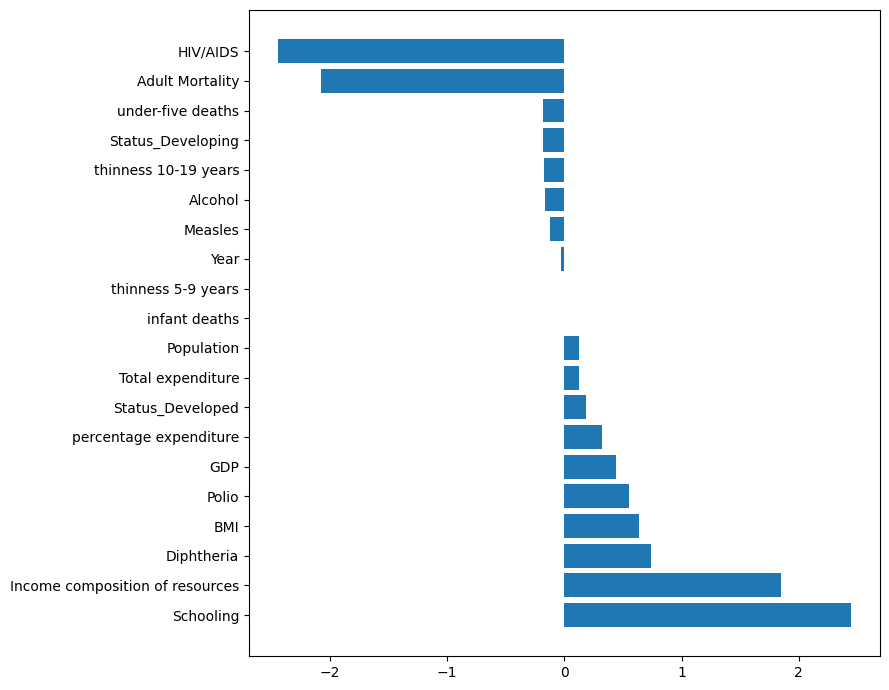

Mean Squared Error: 17.32199334169609
Mean Absolute Error: 3.009223686973721
R-squared: 0.8150188602459395
Adjusted R-squared: 0.810251305097639


In [37]:
# 0.1인 경우의 값
plot_coef(x_train.columns, estimator.coef_)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# 결정계수
num_features = x_train.shape[1]
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - num_features - 1)
print(f'Adjusted R-squared: {adjusted_r2}')

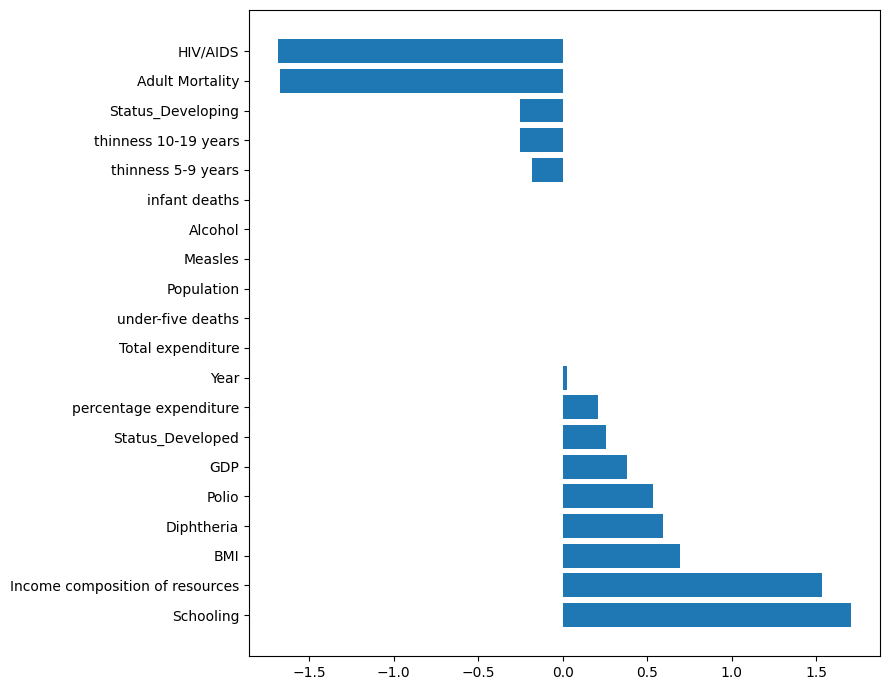

Mean Squared Error: 20.77908378322039
Mean Absolute Error: 3.352965039716173
R-squared: 0.7781006766690708
Adjusted R-squared: 0.7723816219440468


In [39]:
# 1인 경우의 값
plot_coef(x_train.columns, estimator.coef_)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# 결정계수
num_features = x_train.shape[1]
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - num_features - 1)
print(f'Adjusted R-squared: {adjusted_r2}')

### 변수를 선택한 회귀모델
스텝와이즈 선택법을 기반으로 선택되었던 3가지 변수만을 사용

In [47]:
X = data.drop('Life expectancy', axis=1)
X = X.drop('Year', axis=1)
X = X.drop('Status_Developed', axis=1)
X = X.drop('Status_Developing', axis=1)
X = X.drop('infant deaths', axis=1)
X = X.drop('Alcohol', axis=1)
X = X.drop('percentage expenditure', axis=1)
X = X.drop('Measles', axis=1)
X = X.drop('under-five deaths', axis=1)
X = X.drop('Polio', axis=1)
X = X.drop('Total expenditure', axis=1)
X = X.drop('Diphtheria', axis=1)
X = X.drop('GDP', axis=1)
X = X.drop('Population', axis=1)
X = X.drop('thinness 10-19 years', axis=1)
X = X.drop('thinness 5-9 years', axis=1)
X = X.drop('BMI', axis=1)
X = X.drop('Income composition of resources', axis=1)

Y = data["Life expectancy"]

In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655 entries, 0 to 2654
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Adult Mortality  2655 non-null   float64
 1   HIV/AIDS         2655 non-null   float64
 2   Schooling        2655 non-null   float64
dtypes: float64(3)
memory usage: 62.4 KB


In [51]:
# 학습모델의 training, test 구분
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.3)

# 데이터 표준화 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# 회귀모델
lm = sm.OLS(y_train, x_train)
results = lm.fit()

display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Life expectancy   R-squared (uncentered):                   0.014
Model:                            OLS   Adj. R-squared (uncentered):              0.013
Method:                 Least Squares   F-statistic:                              9.078
Date:                Fri, 15 Dec 2023   Prob (F-statistic):                    5.76e-06
Time:                        02:44:29   Log-Likelihood:                         -10521.
No. Observations:                1858   AIC:                                  2.105e+04
Df Residuals:                    1855   BIC:                                  2.106e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Adult Mortality    -1.2840      2.076     -0.618      0.536      -5.356       2.788
HIV/AIDS           -2.2792      1.883     -1.210      0.226      -5.972       1.414
Schooling           6.7144      1.806      3.717      0.000       3.172      10.257
==============================================================================
Omnibus:                      187.041   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1130.437
Skew:                           0.249   Prob(JB):                    3.38e-246
Kurtosis:                       6.789   Cond. No.                         2.17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
model = LinearRegression(n_jobs=-1)
model.fit(x_train, y_train)

# 테스트 세트 예측
y_pred_test = model.predict(x_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# 결정계수
num_features = x_train.shape[1]
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - num_features - 1)
print(f'Adjusted R-squared: {adjusted_r2}')

Mean Squared Error: 18.97418228355335
Mean Absolute Error: 3.1722370714340706
R-squared: 0.7746798102842783
Adjusted R-squared: 0.7738274009915329


### 변수를 선택한 회귀모델의 잔차 시각화
정규성, 등분산성, 독립성

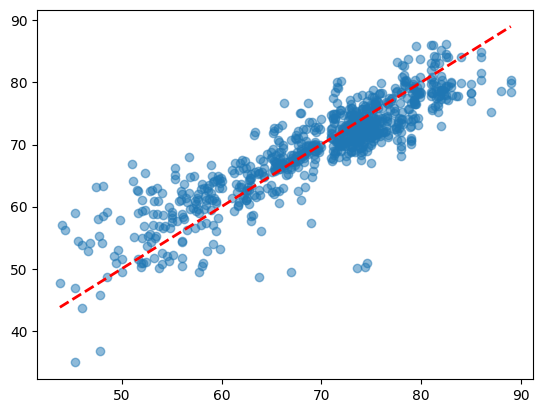

In [53]:
# 산점도 그래프 그리기
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

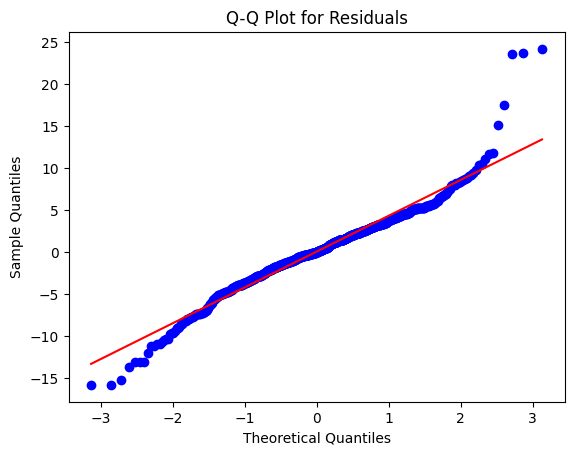

In [54]:
# 정규성
residuals = y_test - y_pred_test

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot for Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

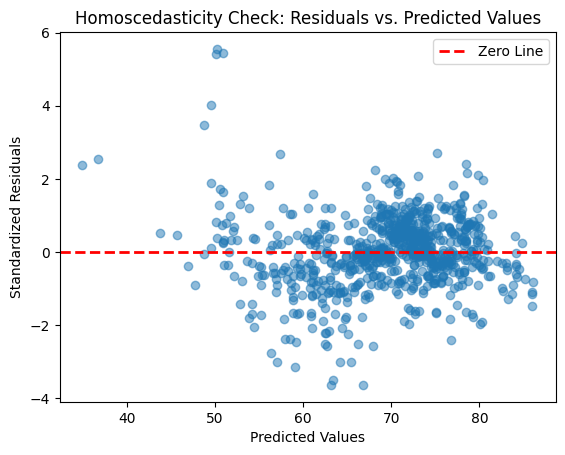

In [55]:
# 잔차의 등분산성
# 표준화된 잔차 계산
residuals = y_test - y_pred_test
std_residuals = residuals / np.std(residuals)

# 산점도 그래프 그리기
plt.scatter(y_pred_test, std_residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Line')

# 그래프에 레이블 및 제목 추가
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals')
plt.title('Homoscedasticity Check: Residuals vs. Predicted Values')
plt.legend()
plt.show()

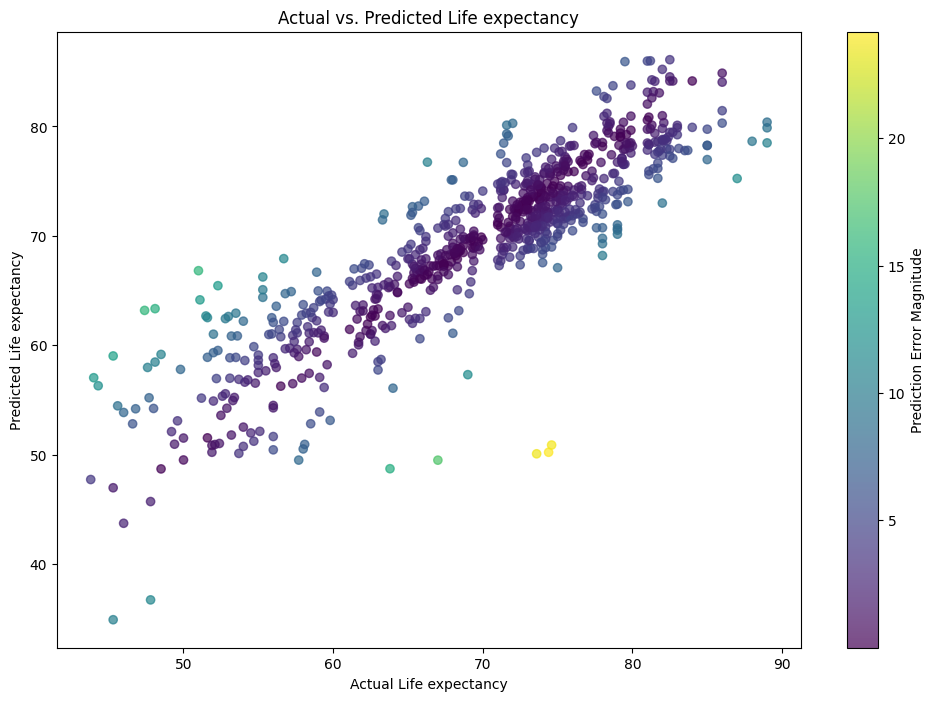

In [56]:
# 예측 오차의 크기에 따라 색상 할당
colors = np.abs(residuals)

# 산점도 시각화
plt.figure(figsize=(12, 8))  # 그림의 크기 조절
plt.scatter(y_test, y_pred_test, c=colors, cmap='viridis', alpha=0.7)
plt.colorbar(label='Prediction Error Magnitude')
plt.xlabel("Actual Life expectancy")
plt.ylabel("Predicted Life expectancy")
plt.title("Actual vs. Predicted Life expectancy")
plt.show()